# Compute Bias, Variance and Mean Square Error

Source - https://towardsdatascience.com/end-your-bias-about-bias-and-variance-67b16f0eb1e6

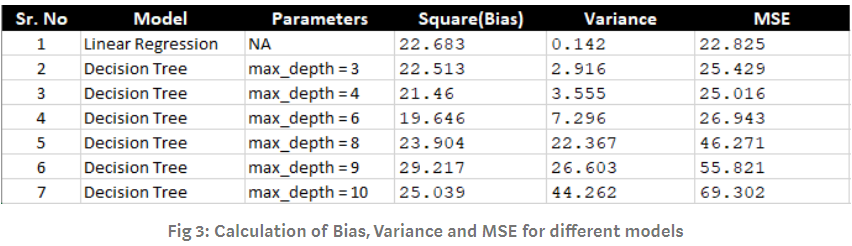
You see the model no. 1 which is linear regression happens to give the best result here. However, best result from Decision tree through model number 3 which is characterized by max_depth=4. So, my point here is clear that we have models of tree where the bias is low(expected) compared to the Linear model. And we also have models where bias is high(surprise) compared to the linear model. It is to be noted that the best fit which both model provide does follow the general convention of high bias-low variance of linear regression, and low bias-high variance of tree. My key point here is that one should not be biased and hold the opinions about these algorithms which are refuted above. <br/>
Ground truth: it’s the trade-off which ought to be followed for the best possible fit. Choosing a specific algorithm will never guarantee high/low values of the two discussed terms.<br/>
The code published above is fully reproducible and one can try and see how their “beliefs” are debunked for other algorithms like KNN, Logistic regression, Support Vector Machines in the regards of bias-variance. One thing to keep in mind, if you happen to try that out for classification problems, the formulation for bias and variance would be changed, since formula shown above is valid for least square estimate. You can probably think to design score metric like L(y’, y)= 1 if y’=y else 0.<br/>
PS:<br/>
 1) This post is to demonstrate how one can calculate and decompose the prediction error into the bias and variance given the model.<br/>
 2)This post is meant to debunk the myths about the typical convention of bias- variance for different ML algorithms.<br/>
 3) This post is NOT about explaining nitty-gritty of bias-variance tradeoff in Machine Learning.<br/>

In [52]:
## Following steps helps in calculating bias and variance for linear and Decision tree model. 

import pandas as pd
import numpy as np
import random
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor

## Defining Real population
def real_population(x1, x2, x3, x4, x5, size=5000, random_state=1234):
    #set.seed(99)
    b0= 1.1
    b1=2.2
    b2 = 3.3
    b3= 4.4
    b4=5.5
    b5= 6.6
    y = b0 + b1*x1 + b2*(x2**2) + b3*(x3*x4) + b4*x4 + b5*x5 
    r = np.random.RandomState(random_state)
    irr_noise = r.normal(-5, 10, size)
    y = y + irr_noise
    df = pd.DataFrame({'target':y, 'X1':x1, 'X2':x2, 'X3':x3, 'X4':x4, 'X5':x5})
    return df

## Function to simulate the data as per the real population
def simulation_data(size = 5000, random_seed= 99):
    np.random.seed(random_seed)
    x1 = np.random.rand(size)
    x2 = np.random.rand(size)
    x3 = np.random.rand(size)
    x4 = np.random.rand(size)
    x5 = np.random.rand(size)
    df = real_population(x1,x2,x3,x4,x5,size)
    return df

## function to compute mean square error
def get_mse(mydf, model='Lin'):
    truth = real_population(X_test[0], X_test[1],X_test[2],X_test[3],X_test[4], size=1)['target'][0]
    truth = [truth] * simulations
    if(model== 'Lin'):
        estimate = mydf[1]
    else:
        estimate = mydf[2]
    m = np.mean((estimate - truth)**2)
    return m

## function to compute bias
def get_bias(mydf, model='Lin'):
    truth = real_population(X_test[0], X_test[1],X_test[2],X_test[3],X_test[4], size=1)['target'][0]
    #truth = [truth] * simulations
    if(model== 'Lin'):
        estimate = mydf[1]
    else:
        estimate = mydf[2]
    bias = np.mean(estimate) - truth
    return bias

## function to compute variance
def get_var(mydf, model='Lin'):
    if(model== 'Lin'):
        estimate = mydf[1]
    else:
        estimate = mydf[2]
    var = np.mean((estimate - np.mean(estimate))**2)
    return var

## function to run the simulation 
def run_simulation(lin_model, tree_model, sims = 100):
    simulations = sims
    predicted = []
    for i in range(0, simulations):
        D = simulation_data(5000, i)
        X = D[['X1', 'X2', 'X3', 'X4', 'X5']]
        Y = D['target']
        lin_model.fit(X,Y)
        tree_model.fit(X,Y)
        tup = (i, reg.predict(pd.DataFrame(X_test).T), tree.predict(pd.DataFrame(X_test).T))
        predicted.append(tup)
    predicted_df = pd.DataFrame(predicted)
    return predicted_df

## function to evaluate the different metrics of simulation
def evaluate_simulation(prediction_df, depth):
    dftmp = pd.DataFrame(columns=['Model', 'Parameters', 'Squared Bias', 'Variance', 'MSE'])
    
    lb = get_bias(prediction_df, 'Lin')**2
    tb = get_bias(prediction_df, 'tree')**2
    
    lv = get_var(prediction_df, 'Lin')
    tv = get_var(prediction_df, 'tree')
    
    lm = get_mse(prediction_df, 'Lin')
    tm = get_mse(prediction_df, 'tree')
    
    if (depth == 0):
        dftmp = dftmp.append({
                                'Model': 'Linear Regression', 
                                'Parameters':'NA', 
                                'Squared Bias': np.round(lb, 3), 
                                'Variance': np.round(lv, 3),
                                'MSE': np.round(lm, 3)}, ignore_index=True)

    if (depth > 0):
        dftmp = dftmp.append({
                                'Model': 'Decision Tree', 
                                'Parameters': depth, 
                                'Squared Bias': np.round(tb, 3), 
                                'Variance': np.round(tv, 3),
                                'MSE': np.round(tm, 3)}, ignore_index=True)
    return(dftmp)

In [53]:
df = pd.DataFrame(columns=['Model', 'Parameters', 'Squared Bias', 'Variance', 'MSE'])

## Invoking the functions defined above
reg = linear_model.LinearRegression()
simulations = 100
np.random.seed(22)
X_test = np.random.rand(5)

for depth in [3,4,6,8,9,10]:
    print('Processing depth - ', depth)
    tree = DecisionTreeRegressor(max_depth=depth)
    results = run_simulation(reg, tree)
    df = df.append(evaluate_simulation(results, depth))

df

Processing depth -  3
Processing depth -  4
Processing depth -  6
Processing depth -  8
Processing depth -  9
Processing depth -  10


,Model,Parameters,Squared Bias,Variance,MSE
0,Decision Tree,3,[12.953],[1.456],[14.409]
0,Decision Tree,4,[15.775],[2.069],[17.844]
0,Decision Tree,6,[17.461],[4.085],[21.547]
0,Decision Tree,8,[21.339],[6.947],[28.286]
0,Decision Tree,9,[19.775],[10.406],[30.18]
0,Decision Tree,10,[20.184],[15.514],[35.698]


NOTE: IN THE TABLE, I'VE MISSED LINEAR REGRESSION. NEED TO CHECK IT! 
PLEASE REFER TO THE SOURCE LINK https://towardsdatascience.com/end-your-bias-about-bias-and-variance-67b16f0eb1e6